<h2 align="center"> Univariate Linear Regression </h2>

### Task 1: Load the Data and Libraries
---

In [1]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
data = pd.read_csv("bike_sharing_data.txt")

In [4]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Task 2: Visualize the Data
---

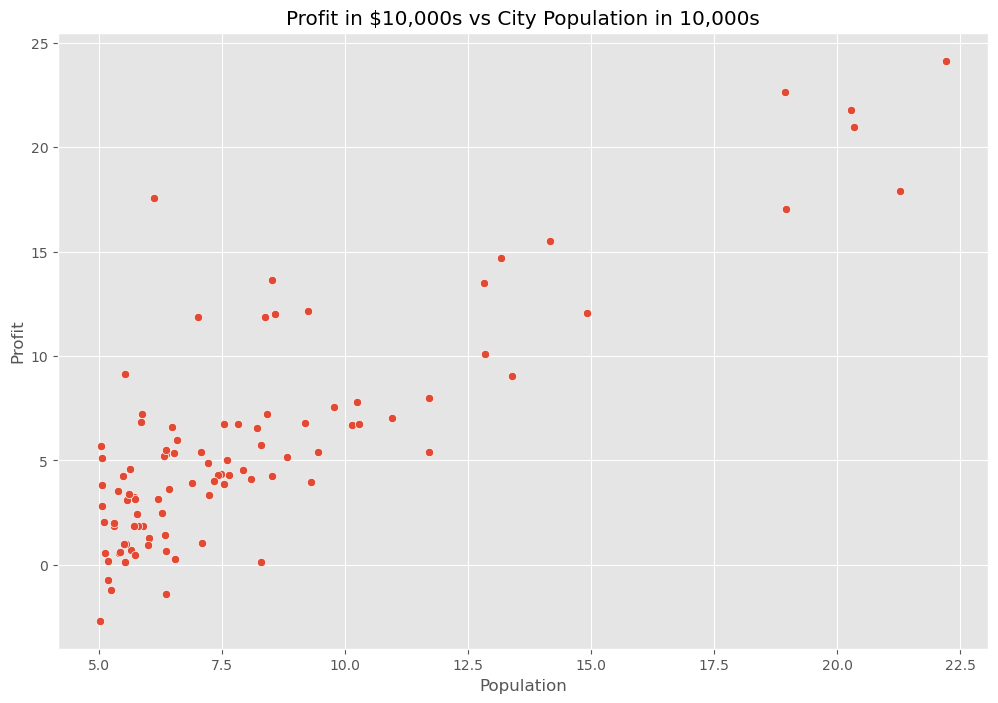

In [6]:
ax = sns.scatterplot(x="Population",y="Profit",data=data)
ax.set_title("Profit in $10,000s vs City Population in 10,000s");

We see that in general there is some trend in the data. We can assume there is a linear relationship between profit and population. We can confirm this by calculating a line of best fit and once we know there is a linear relationship we will use the same line of best fit to predict profit using new unseen data of population.

### Task 3: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [7]:
def cost_function(X, y, theta):
    """
    Computes the cost function for linear regression.
    
    Arguments:
    - X: Input features (numpy array of shape (m, n))
    - y: Target variable (numpy array of shape (m, 1))
    - theta: Theta parameters (numpy array of shape (n, 1))
    
    Returns:
    - cost: Cost function value (float)
    """
    m = len(y)  # Number of training examples
    
    # Perform prediction using current theta values
    y_pred = X.dot(theta)
    
    # Calculate the squared error between predictions and actual values
    error = (y_pred - y) ** 2
    
    # Compute the cost function value by summing the squared errors
    cost = 1 / (2 * m) * np.sum(error)
    
    return cost

In [8]:
# number of data points in the dataset
m = data.Population.values.size

# a matrix containing the feature values (population) of the dataset, 
# with an additional column of ones for the intercept term
X = np.append(np.ones((m,1)), data.Population.values.reshape(m,1), axis=1)

# column vector containing the target values (profit) of the dataset
y = data.Profit.values.reshape(m,1)

# column vector of initial parameter values
theta = np.zeros((2,1))

cost_function(X, y, theta)

32.072733877455676

### Task 4: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [9]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    Performs gradient descent to optimize the theta parameters for linear regression.
    
    Arguments:
    - X: Input features (numpy array of shape (m, n))
    - y: Target variable (numpy array of shape (m, 1))
    - theta: Initial theta parameters (numpy array of shape (n, 1))
    - alpha: Learning rate (float)
    - iterations: Number of iterations to perform (int)
    
    Returns:
    - theta: Optimized theta parameters (numpy array of shape (n, 1))
    - costs: List of cost function values during iterations (list of floats)
    """
    m = len(y)  # Number of training examples
    costs = [] # List to store cost function values during iterations
    
    for i in range(iterations):
        # Perform prediction using current theta values
        y_pred = X.dot(theta)
        
        # Calculate the error between predictions and actual values
        error = np.dot(X.transpose(), (y_pred - y))
        
        # Update theta parameters using gradient descent update rule
        theta -= alpha * (1/m) * error
        
        # Calculate and store the cost function value for current theta
        costs.append(cost_function(X, y, theta))
    
    return theta, costs

In [10]:
# Perform gradient descent to optimize theta parameters
theta, costs = gradient_descent(X, y, theta, alpha=0.01, iterations=2000)

print("h(x) = {} + {}x1".format(str(round(theta[0,0],2)),
                               str(round(theta[1,0],2))))

h(x) = -3.79 + 1.18x1


### Task 5: Visualising the Cost Function $J(\theta)$
---

In [11]:
from mpl_toolkits.mplot3d import Axes3D

In [12]:
theta_0 = np.linspace(-10, 10, 100)  # Generate an array of 100 values from -10 to 10 for theta_0
theta_1 = np.linspace(-1, 4, 100)    # Generate an array of 100 values from -1 to 4 for theta_1

cost_values = np.zeros((len(theta_0), len(theta_1)))  # Create a 2D array of zeros to store the cost values

# Iterate over the values of theta_0 and theta_1 to calculate the cost function for each combination
for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])  # Create a numpy array with the current theta values
        cost_values[i, j] = cost_function(X, y, t)  # Calculate and store the cost function value

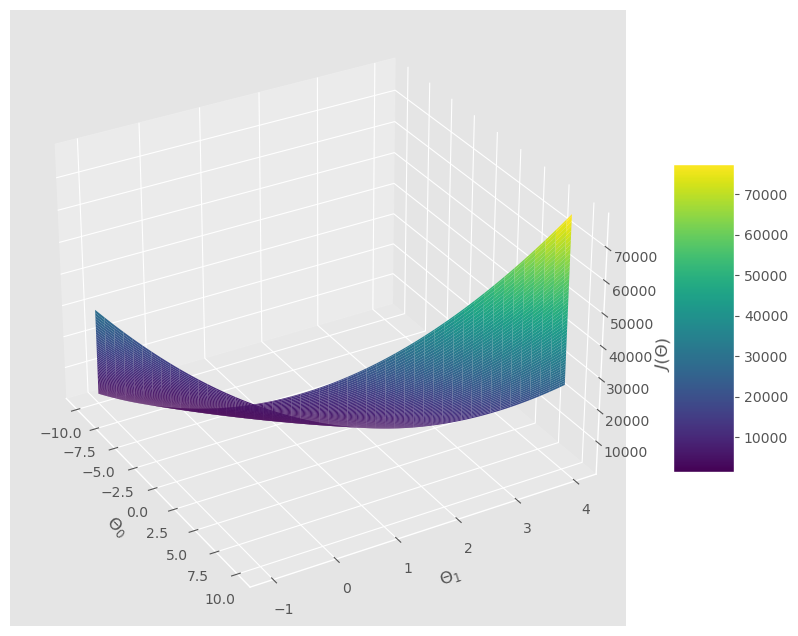

In [15]:
fig = plt.figure(figsize=(12, 8))  # Create a new figure with a specified size
ax = plt.subplot(projection='3d')  # Get the current axes and set it to a 3D projection

# Create a surface plot using theta_0, theta_1, and cost_values
surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap="viridis")

# Add a colorbar to the plot
fig.colorbar(surf, shrink=0.5, aspect=5)

# Set x, y, and z labels
plt.xlabel("$\Theta_0$") 
plt.ylabel("$\Theta_1$")  
ax.set_zlabel("$J(\Theta)$")  

ax.view_init(30, 330)  # Set the viewpoint angles for the 3D plot

plt.show()  # Display the plot


The surface plot visualizes the relationship between theta parameters (theta_0 and theta_1) and the corresponding cost function values. Each point on the plot represents a combination of theta_0 and theta_1, and the height of the point represents the cost function value associated with those theta values.

The plot allows us to visualize the cost function landscape and identify the regions of lower and higher costs. By examining the plot, we can identify the optimal values of theta_0 and theta_1 that correspond to the lowest point on the surface, indicating the minimum cost.



### Task 6: Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

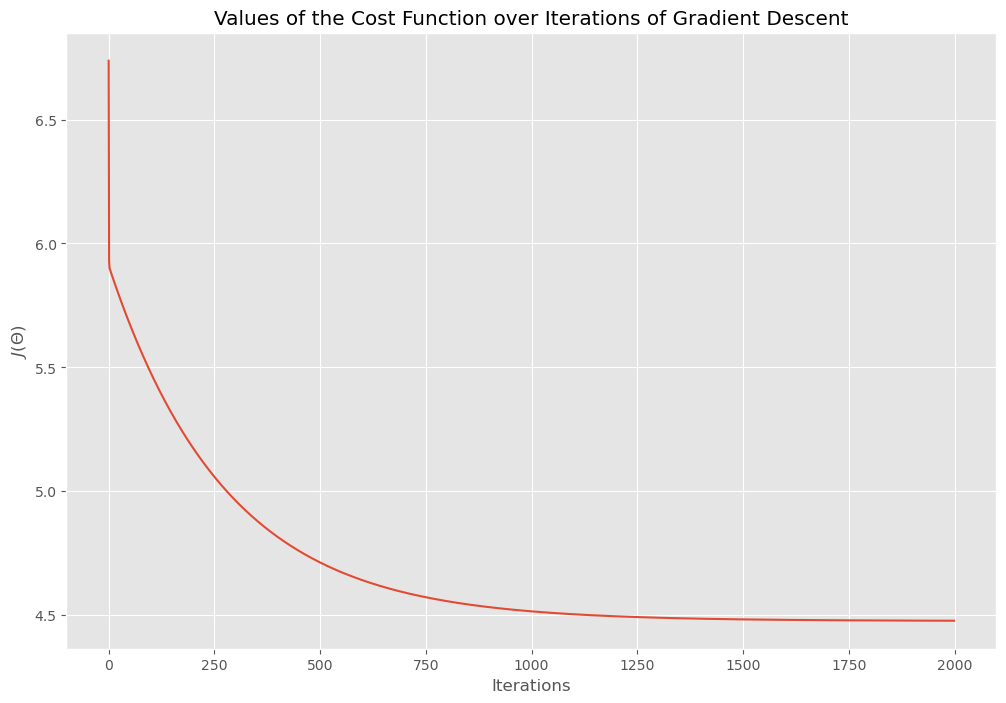

In [16]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of the Cost Function over Iterations of Gradient Descent");

### Task 7: Training Data with Linear Regression Fit
---

In [17]:
theta

array([[-3.78806857],
       [ 1.18221277]])

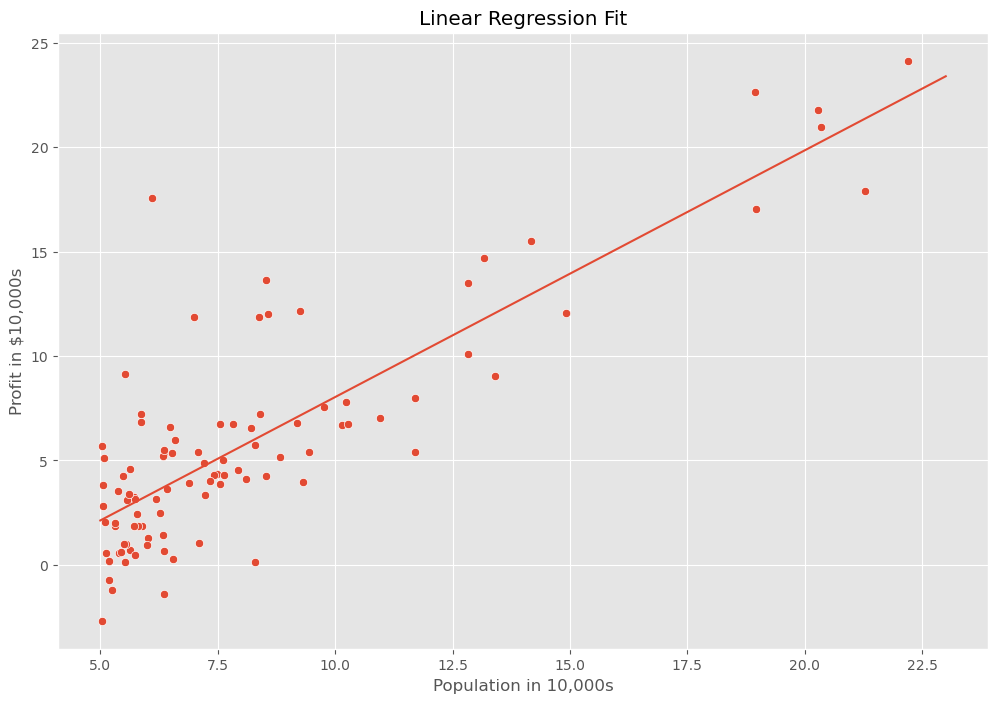

In [23]:
# Remove unnecessary dimensions from the theta array
theta = np.squeeze(theta) 

# Create a scatter plot using the "Population" and "Profit" columns from the data
ax = sns.scatterplot(x="Population", y="Profit", data=data)  

# Generate a range of x values for the regression line
x_value = [x for x in range(5, 24)]  
# Calculate the corresponding y values using the linear regression equation
y_value = [(x * theta[1] + theta[0]) for x in x_value]  

# Plot the regression line using the x and y values
sns.lineplot(x=x_value, y=y_value)  

plt.xlabel("Population in 10,000s")  
plt.ylabel("Profit in $10,000s") 
plt.title("Linear Regression Fit");

### Task 8: Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$

In [24]:
def predict(x, theta):
    """
    Predicts the value of the target variable using the learned theta parameters.
    
    Arguments:
    - x: Input features (numpy array of shape (n,))
    - theta: Theta parameters (numpy array of shape (n,))
    
    Returns:
    - y_pred: Predicted value of the target variable (float)
    """
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

In [25]:
y_pred_1 = predict(np.array([1,4]), theta) * 10000
print("For a population of 40,000 people, the model predicts a profit of $" + str(round(y_pred_1, 0)))

For a population of 40,000 people, the model predicts a profit of $9408.0


In [26]:
y_pred_2 = predict(np.array([1,8.3]), theta) * 10000
print("For a population of 83,000 people, the model predicts a profit of $" + str(round(y_pred_2, 0)))

For a population of 83,000 people, the model predicts a profit of $60243.0
